
# Borderline-SMOTE
Machine Learning with Imbalanced Data - Course

* Creates new samples by interpolation between samples of the minority class and their closest neighbours.

* It does not use all observations from the minority class as templates, unllike SMOTE.

* It selects those observations (from the minority) for which, most of their neighbours belong to a different class (DANGER group)

* Variant 1 creates new examples, as SMOTE, between samples in the Danger group and their closest neighbours from the minority

* Variant 2 creates new examples between samples in the Danger group and neighbours from minority and majority class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import BorderlineSMOTE

## Create data

In [2]:
# config options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas columns
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced Xset
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=blobs_random_seed)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

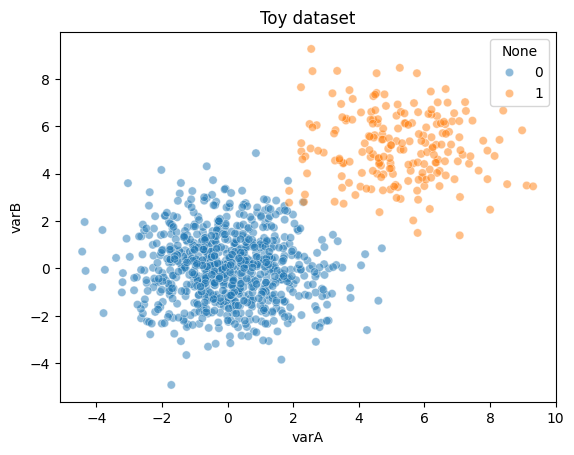

In [3]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Borderline SMOTE

In [4]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,  # the neighbours to create new examples
    m_neighbors=10, # the neighbours to find the DANGER group
    kind='borderline-1',    # variant
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

In [5]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,  # the neighbours to create new examples
    m_neighbors=10, # the neighbours to find the DANGER group
    kind='borderline-2',    # variant
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

In [6]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# size of oversampled data
X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [8]:
X_res_b2.shape, y_res_b2.shape

((1600, 2), (1600,))

In [9]:
# number of minority class observations
y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

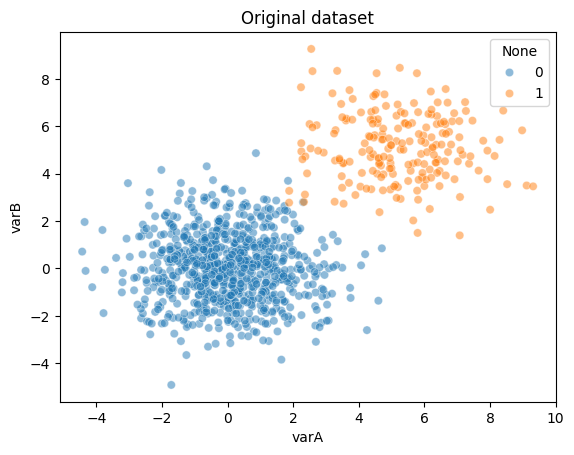

In [10]:
# plot of original data
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

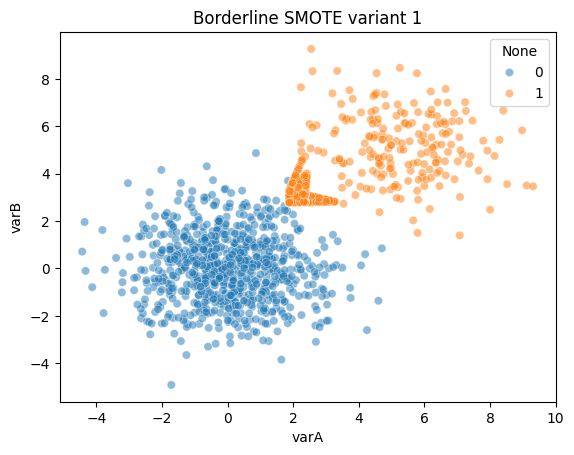

In [11]:
# plot of oversampled data
sns.scatterplot(
    data=X_res_b1, x="varA", y="varB", hue=y_res_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

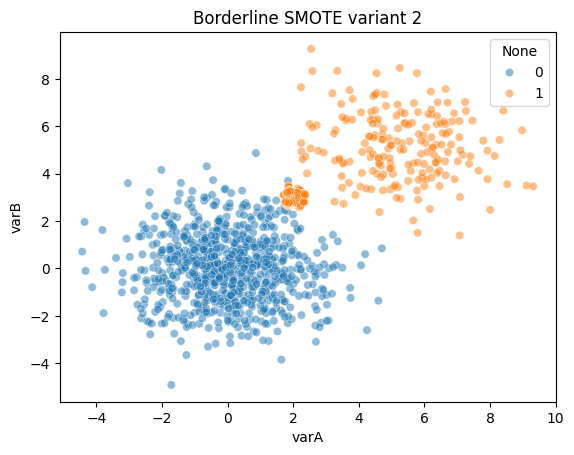

In [12]:
# plot of oversampled data
sns.scatterplot(
    data=X_res_b2, x="varA", y="varB", hue=y_res_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()

We can see that if we use the variant 2, we create more synthetic data towards the majority class.